<a href="https://colab.research.google.com/github/UICHEOL-HWANG/colab_upload/blob/master/naver_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np 
import pandas as pd 
import urllib.request
from bs4 import BeautifulSoup as bs
import datetime
import json

In [ ]:
def get_shop(client_id,client_secret):
  url = "https://openapi.naver.com/v1/datalab/shopping/categories"
  body = '''{\"startDate\" : \"2022-01-01\" , \"endDate\":\"2023-06-09\",\"timeUnit\":\"month\",
  \"category\": 
  [
    {\"name\" : \"사이다\",\"param\":[\"50002253\"]},
    {\"name\" : \"콜라\",\"param\":[\"50002254\"]},
    {\"name\" : \"이온음료\",\"param\":[\"50002256\"]}
  ],
  \"device\" : \"\",\"ages\" : [],\"gender\" : \"\"}
  '''

  
  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  request.add_header("Content-Type","application/json")
  response = urllib.request.urlopen(request, data=body.encode("utf-8"))
  
  try:
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
  except:
    logging.error(response.read())
    sys.exit(1)
  response = urllib.request.urlopen(request, data=body.encode("utf-8"))

  if response.getcode() == 200:
    response_body = response.read()
    contents = response_body.decode("utf-8")
  else:
    print(response.getcode())
    print(response.read())
    sys.exit(1)


  return contents

def get_data():
  shops = get_shop("","")
  data = json.loads(shops)
  dt = dict()
  months = [] 

  for i in data['results'][0]['data']:
    months.append(i['period'])

    for j in range(0,3):
      ratio = []
      for a in data['results'][j]['data']:
        ratio.append(a['ratio'])
        dt[data['results'][j]['title']]=ratio
  df = pd.DataFrame.from_dict(dt)
  df['Month'] = months
  df['Period'] = df['Month'].apply(lambda x : x[2:7])
  final_df = df.set_index('Period')
  return final_df
 
def get_graph():
  plt.rcParams["font.size"] = 12
  plt.figure(figsize =(16,8))

  plt.plot(get_data().index,get_data()['사이다'])
  for x,y in enumerate(list(get_data()['사이다'])):
    plt.text(x,y,y, fontsize = 10, color ='#ff0000',
             horizontalalignment= 'center',verticalalignment = 'bottom')
  
  plt.plot(get_data().index,get_data()['콜라'])
  for x,y in enumerate(list(get_data()['콜라'])):
    plt.text(x,y,y, fontsize = 10, color ='#ff0000',
             horizontalalignment= 'center',verticalalignment = 'bottom')
  
  plt.plot(get_data().index,get_data()['이온음료'])
  for x,y in enumerate(list(get_data()['이온음료'])):
    plt.text(x,y,y, fontsize = 10, color ='#ff0000',
             horizontalalignment= 'center',verticalalignment = 'bottom')

  plt.legend(['사이다','콜라','이온음료'],loc='upper left')
  plt.show()

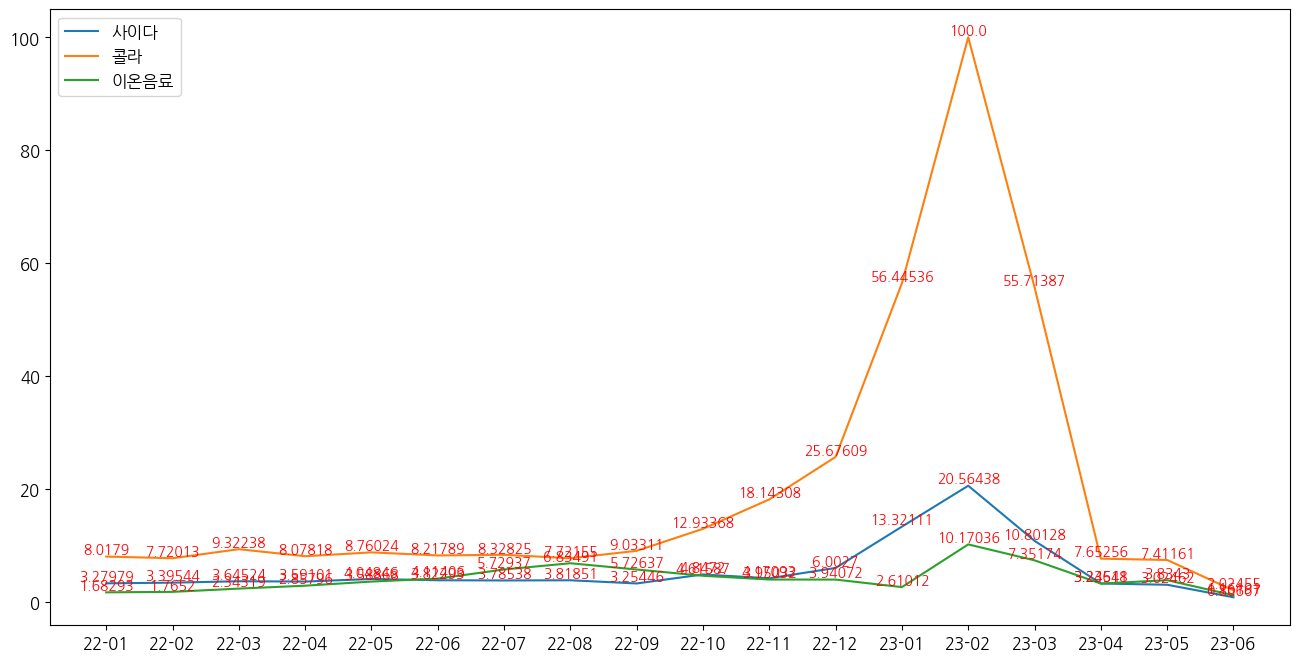

In [ ]:
get_graph()